In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
car_dataframe = pd.read_csv("data/car details v4.csv")
car_dataframe.loc[:, ["Price", "Kilometer"]]

,Price,Kilometer
0,505000,87150
1,450000,75000
2,220000,67000
3,799000,37500
4,1950000,69000
...,...,...
2054,850000,90300
2055,275000,83000
2056,240000,73000
2057,4290000,60474


In [3]:
#x = (car_dataframe.loc[:, ["Kilometer"]]).to_numpy().reshape(-1).astype('float64')
#y = (car_dataframe.loc[:, ["Price"]]).to_numpy().reshape(-1).astype('float64')
x = (car_dataframe.loc[:, ["Fuel Tank Capacity"]]).to_numpy().reshape(-1).astype('float64')
y = (car_dataframe.loc[:, ["Price"]]).to_numpy().reshape(-1).astype('float64')
#y = np.log(y)

print(x)
print(y)

nan_indexs = np.isnan(x)

print(nan_indexs != 1)

x = x[nan_indexs != 1]
y = y[nan_indexs != 1]

x = x/x.mean()
y = y/y.mean()
print(x.shape)
print(x)
print(y.shape)
print(y)

[35. 42. 35. ... 45. 65. nan]
[ 505000.  450000.  220000. ...  240000. 4290000.  670000.]
[ True  True  True ...  True  True False]
(1946,)
[0.67304832 0.80765799 0.67304832 ... 0.61535847 0.86534784 1.24994689]
(1946,)
[0.30088322 0.26811376 0.13107784 ... 0.1638473  0.14299401 2.55601784]


In [4]:
def make_pred(x, w, b):
    return w*x+b

def compute_cost(x, y, w, b):
    m = float(x.shape[0])
    pred = make_pred(x, w, b)
    sqd_err = (pred-y)**2
    cost = np.sum(sqd_err) / (2*m)
    return cost 

def run_grad_decent(x, y, w, b, alpha):
    m = x.shape[0]
    diff = make_pred(x, w, b)-y
    new_w = w - alpha*(diff.dot(x))/m
    new_b = b - alpha*np.sum(diff)/m
    return new_w, new_b

In [5]:
def run_linear_regression(x, y, num_iter = 1000, alpha = .1):
    w = 1.
    b = 0.
    cost_history = []

    for _ in range(num_iter):
        w, b = run_grad_decent(x, y, w, b, alpha)

        cost = compute_cost(x, y, w, b)
        # print(cost)
        cost_history.append(cost)

    return w, b, cost_history 

2.8414572635227717 -1.8402002480977717


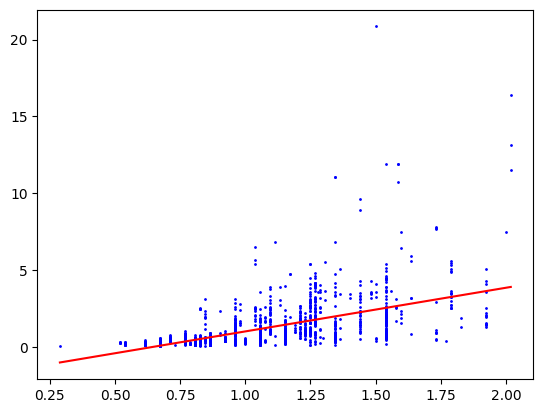

In [6]:
w, b, cost_history = run_linear_regression(x, y)

print(w, b)

largestIndex = x.argmax()
pred_x = np.array([x.min(), x.max()])
pred_y = make_pred(pred_x, w, b)

plt.plot(x, y, 'bo', ms=1) 

plt.plot(pred_x, pred_y, color='red')

plt.show()